<a href="https://colab.research.google.com/github/muhammad-zafar47/00_Student_chat-_Agent/blob/main/00_Chat_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Agent**



In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_google_genai langchain_core langgraph

In [43]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import MessagesState
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.graph.state import CompiledStateGraph
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode
from langgraph.checkpoint.memory import MemorySaver


In [ ]:
# Functions for tools
def give_study_plan(subject: str, hours: int) -> str:
    """Provide a study plan for a given subject and time.

    Args:
        subject: The subject to study.
        hours: Number of hours available.

    Returns:
        A study plan.
    """
    return f"Study Plan: Spend {hours // 2} hours reviewing {subject} theory and {hours // 2} hours solving problems."

In [44]:


def submit_complaint(complaint: str) -> str:
    """Accept and process a user complaint.

    Args:
        complaint: The user's complaint.

    Returns:
        Confirmation message.
    """
    return f"Your complaint has been submitted: '{complaint}'. Thank you for your feedback!"

In [46]:
def give_outfit_idea(event: str) -> str:
    """Suggest an outfit based on the event.

    Args:
        event: The type of event (e.g., party, interview).

    Returns:
        Outfit suggestion.
    """
    outfits = {
        "party": "Wear a stylish dress or a shirt with trousers and comfortable shoes.",
        "interview": "Wear a formal suit or a neat shirt with pants and formal shoes."
    }
    return outfits.get(event.lower(), "Choose an outfit that makes you feel confident and comfortable.")

In [47]:
# Define tools
tools = [submit_complaint, give_study_plan, give_outfit_idea]


In [48]:
# Initialize the language model
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=GEMINI_API_KEY)
llm_with_tools = llm.bind_tools(tools)

In [49]:
# Define the system message
sys_msg = SystemMessage(content="You are a helpful chatbot designed to assist students with complaints, study plans, and outfit ideas for events. You also remember the current conversation to provide better answers.")

# Assistant node function
def assistant(state: MessagesState) -> MessagesState:
    """Handles the assistant's actions in the graph.

    Args:
        state: Current state of the messages.

    Returns:
        Updated state after processing.
    """
    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

In [50]:
# Build the graph
builder: StateGraph = StateGraph(MessagesState)

# Add nodes
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition,
)
builder.add_edge("tools", "assistant")

# Compile the graph with memory
memory = MemorySaver()
react_graph_memory: CompiledStateGraph = builder.compile(checkpointer=memory)


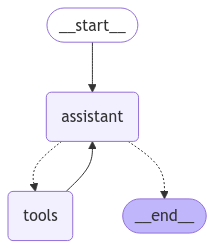

In [51]:
from IPython.display import Image, display
display(Image(react_graph_memory.get_graph(xray=True).draw_mermaid_png()))

In [52]:

# Example usage
# Thread configuration
config = {"configurable": {"thread_id": "student_chatbot"}}


In [53]:
# User input
messages = [HumanMessage(content="I have a complaint about the library timing.")]

In [54]:
# Run the graph with memory
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    print(m.pretty_print())

================================ Human Message =================================

I have a complaint about the library timing.
None
================================== Ai Message ==================================
Tool Calls:
  submit_complaint (73a0bfdd-6464-4d05-b6dd-70de2d3d84c0)
 Call ID: 73a0bfdd-6464-4d05-b6dd-70de2d3d84c0
  Args:
    complaint: The library timing is inconvenient.
None
================================= Tool Message =================================
Name: submit_complaint

Your complaint has been submitted: 'The library timing is inconvenient.'. Thank you for your feedback!
None
================================== Ai Message ==================================

I have submitted your complaint about the library timing. Thank you for your feedback! Is there anything else?
None


In [38]:
# Continuing conversation
messages = [HumanMessage(content="Can you suggest an outfit for a party?")]
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    print(m.pretty_print())


================================ Human Message =================================

I have a complaint about the library timing.
None
================================== Ai Message ==================================
Tool Calls:
  submit_complaint (51d76945-9650-46c0-bf81-afb0a5e58289)
 Call ID: 51d76945-9650-46c0-bf81-afb0a5e58289
  Args:
    complaint: The library timing is inconvenient.
None
================================= Tool Message =================================
Name: submit_complaint

Your complaint has been submitted: 'The library timing is inconvenient.'. Thank you for your feedback!
None
================================== Ai Message ==================================

OK. I've submitted your complaint about the library timing. Is there anything else?
None
================================ Human Message =================================

I have a complaint about the library timing.
None
================================== Ai Message ==================================
Tool Call

In [55]:
# Continuing conversation
messages = [HumanMessage(content="Can you suggest me study plane for cell membrane and nervous system , i have 5 hours ? . you can provide some enjoying topic for my refreshment i am soo tide")]
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    print(m.pretty_print())


================================ Human Message =================================

I have a complaint about the library timing.
None
================================== Ai Message ==================================
Tool Calls:
  submit_complaint (73a0bfdd-6464-4d05-b6dd-70de2d3d84c0)
 Call ID: 73a0bfdd-6464-4d05-b6dd-70de2d3d84c0
  Args:
    complaint: The library timing is inconvenient.
None
================================= Tool Message =================================
Name: submit_complaint

Your complaint has been submitted: 'The library timing is inconvenient.'. Thank you for your feedback!
None
================================== Ai Message ==================================

I have submitted your complaint about the library timing. Thank you for your feedback! Is there anything else?
None
================================ Human Message =================================

Can you suggest me study plane for cell membrane and nervous system , i have 5 hours ? . you can provide some enj